# Taller Análisis de Datos TripleTen

¡Bienvenidos a nuestro mini-curso! En este notebook veremos cómo realizar un análisis rápido de datos y lo fácil que es realizarlo usando Python.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from google.colab import drive

In [2]:
# Montar drive
drive.mount('/content/drive')
sns.set_theme()

Mounted at /content/drive


In [9]:
# Leer archivos
base_path = "/content/drive/MyDrive/Cursos/Python 2024/TripleTen"
contract = pd.read_csv(f"{base_path}/contract.csv")
internet = pd.read_csv(f"{base_path}/internet.csv")
personal = pd.read_csv(f"{base_path}/personal.csv")
phone = pd.read_csv(f"{base_path}/phone.csv")

In [10]:
# Obtener cantidad de filas y columnas
contract.shape

(7043, 8)

In [11]:
# Obtener primeros registros tabla Contract
contract.head()

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65


In [12]:
# Obtener primeros registros tabla Internet
internet.head()

,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [13]:
# Obtener primeros registros tabla Personal
personal.head()

,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [14]:
# Obtener primeros registros tabla Phone
phone.head()

,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


## Preprocesamiento

Este paso nos simplificará la manera de manipular los datos. En lugar de estar manipulando las 4 tablas, juntaremos todo en una sola para hacernos la vida más sencilla.

In [15]:
# Crear un nuevo dataset con la unión de las tres tablas
dataset = (
    contract
    .merge(personal, on="customerID", how="left")
    .merge(phone, on="customerID", how="left")
    .merge(internet, on="customerID", how="left")
)

# Crear nueva columna en el dataset con base en la columna EndDate de la tabla original Contract
dataset["Churn"] = (~(dataset["EndDate"] == "No")).astype("int8")

In [16]:
# Obtener cantidad de filas y columnas del dataset
dataset.shape

(7043, 21)

In [17]:
# Obtener los primeros registros del dataset
dataset.head(5)

,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,...,Dependents,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,29.85,Female,0,...,No,NaN,DSL,No,Yes,No,No,No,No,0
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,1889.5,Male,0,...,No,No,DSL,Yes,No,Yes,No,No,No,0
2,3668-QPYBK,2019-10-01,2019-12-01 00:00:00,Month-to-month,Yes,Mailed check,53.85,108.15,Male,0,...,No,No,DSL,Yes,Yes,No,No,No,No,1
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1840.75,Male,0,...,No,NaN,DSL,Yes,No,Yes,Yes,No,No,0
4,9237-HQITU,2019-09-01,2019-11-01 00:00:00,Month-to-month,Yes,Electronic check,70.70,151.65,Female,0,...,No,No,Fiber optic,No,No,No,No,No,No,1


In [18]:
# Obtener listado de columnas del dataset
dataset.columns

Index(['customerID', 'BeginDate', 'EndDate', 'Type', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'gender',
       'SeniorCitizen', 'Partner', 'Dependents', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn'],
      dtype='object')

# Análisis de datos

Contestemos a la pregunta sobre qué comportamientos son diferentes en los usuarios que cancelan vs. en los usuarios que no cancelan. Usemos todo tipo de métricas y visualizaciones para hacer la interpretación más sencilla.

Dividamos este análisis en dos partes:
1. Dimensiones demográficas
2. Dimensiones de servicios

## Análisis demográfico

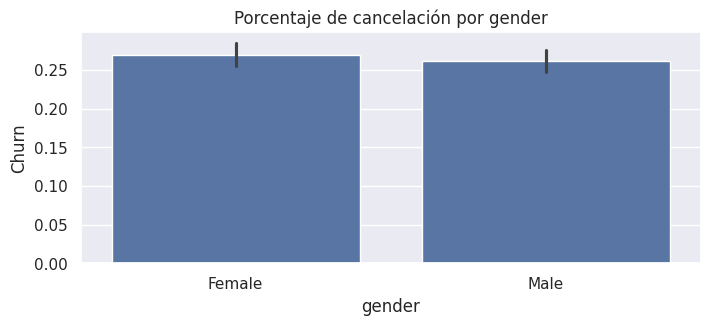

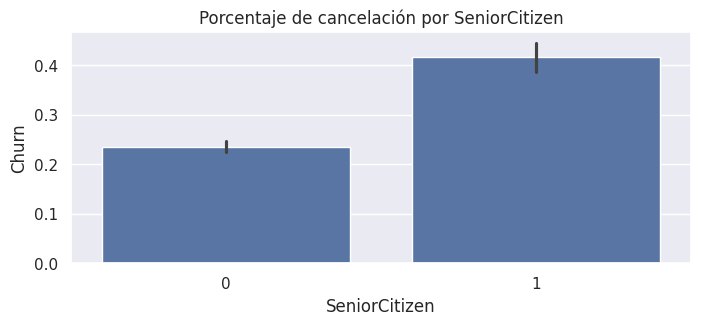

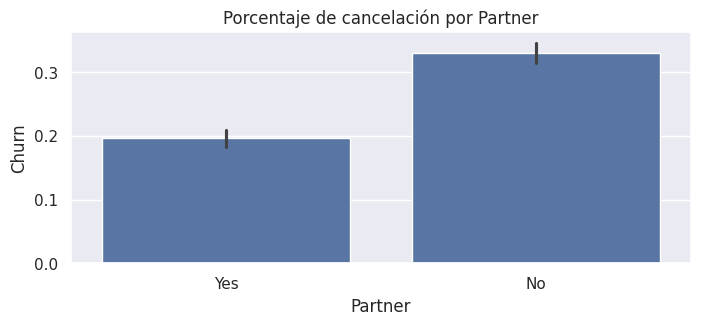

In [19]:
# Listado de columnas a analizar
demographics = ["gender", "SeniorCitizen", "Partner"]

# Recorrer listado de columnas
for dem in demographics:
  # Crear gráfico de barras con base en la columna seleccionada y la columna Churn (Finalizó o no el servicio)
  plt.figure(figsize=(8, 3))
  sns.barplot(data=dataset, x=dem, y="Churn", ax=plt.gca())
  plt.title(f"Porcentaje de cancelación por {dem}")
  plt.show()

Se observa que existe un alto porcentaje de cancelación de los servicios cuando:
*   Se trata de un adulto mayor
*   No convive con una pareja

## Análisis de servicios

Con este análisis podremos extraer información valiosa para nuestros agentes dedicados al mantenimiento de nuestros clientes. Podremos identificar patrones que nos informen sobre qué hace que un usuario cancele con mayor probabilidad.

Con esta información, podremos emitir recomendaciones sobre el acercamiento que deberían de tener nuestros agentes con nuestros clientes (por ejemplo, vender más servicios y cuáles o no vender más servicios).

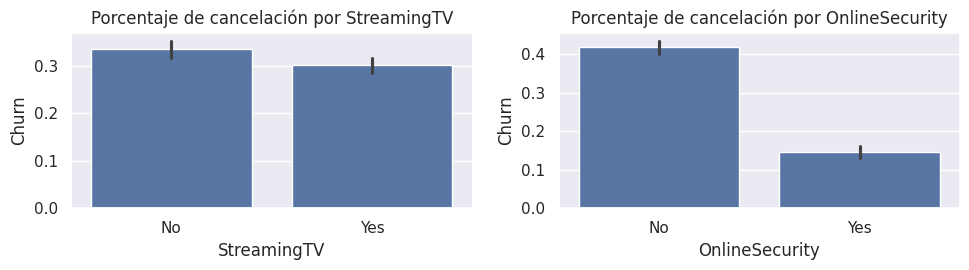

In [23]:
# Obtener listado de columnas a analizar
services = ["StreamingTV", "OnlineSecurity"]

# Se crea una figura que tendrá un subplot de dos columnas
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10, 3))

# Recorrer listado de columnas
for i, ser in enumerate(services):
  ax = axes.flatten()[i]

  # Crear gráfico de barras con base en la columna seleccionada y la columna Churn (Finalizó o no el servicio)
  sns.barplot(data=dataset, x=ser, y="Churn", ax=ax)
  ax.set_title(f"Porcentaje de cancelación por {ser}")

# Ajustar tamaño entre subplots
fig.tight_layout(pad=1.5)

Se observa que el servicio con menos cancelaciones es el de Online Security

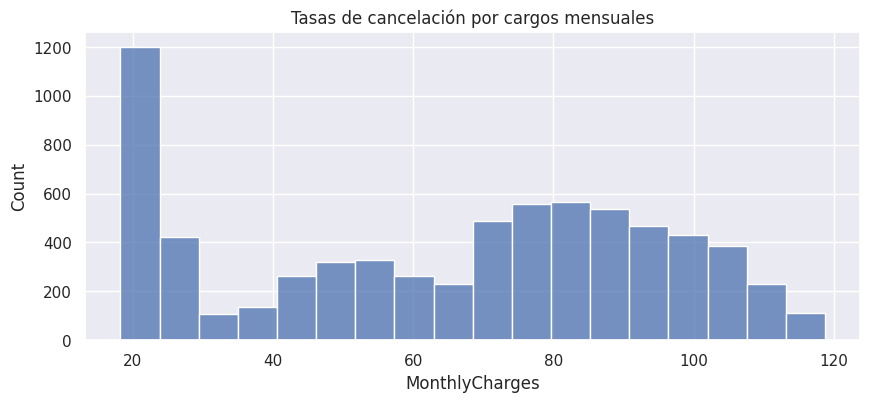

In [24]:
# Crear histograma con base en el cargo mensual
plt.figure(figsize=(10, 4))
sns.histplot(dataset, x="MonthlyCharges", ax=plt.gca())
plt.title("Tasas de cancelación por cargos mensuales")
plt.show()

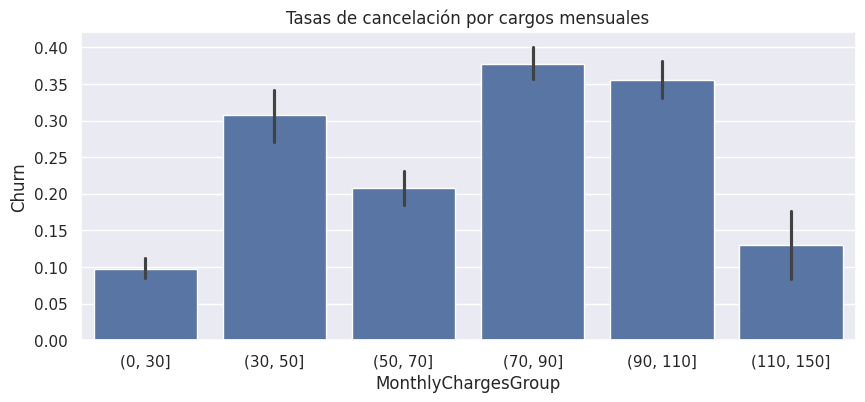

In [25]:
# Crear una nueva columna en el dataset agrupando en intervalos los valores de la columna MonthlyCharges
dataset["MonthlyChargesGroup"] = pd.cut(dataset["MonthlyCharges"], bins=[0, 30, 50, 70, 90, 110, 150])

# Crear gráfico de barras con base en la columna Churn (Finalizó o no el servicio)
plt.figure(figsize=(10, 4))
sns.barplot(dataset, x="MonthlyChargesGroup", y="Churn", ax=plt.gca())
plt.title("Tasas de cancelación por cargos mensuales")
plt.show()

Vemos que los usuarios que han cancelado tienden a tener mayores cargos mensuales en su recibo.

Ahora, analicemos la distribución de cargos mensuales dependiendo de si el cliente canceló o no canceló.

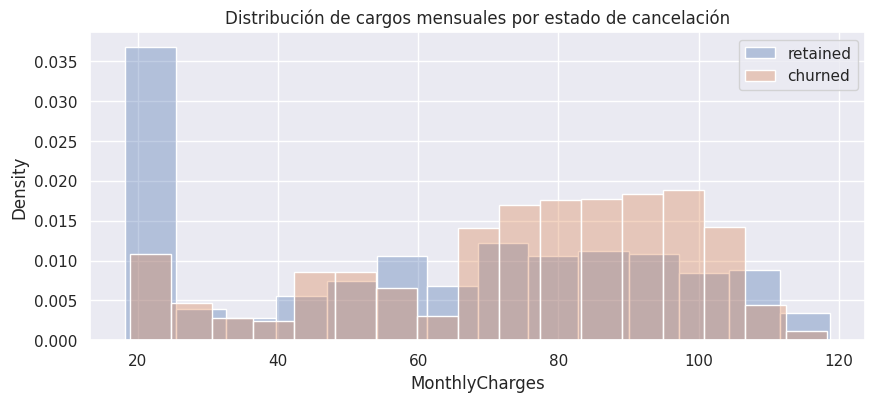

In [28]:
# Crear histograma con base en las columnas MonthlyCharges y Churn, para saber los cargos mensuales y si cancelo o no el servicio
plt.figure(figsize=(10, 4))
sns.histplot(dataset.query("Churn == 0")["MonthlyCharges"], label="retained", stat="density", alpha=0.35, ax=plt.gca())
sns.histplot(dataset.query("Churn == 1")["MonthlyCharges"], label="churned", stat="density", alpha=0.35, ax=plt.gca())
plt.legend()
plt.title("Distribución de cargos mensuales por estado de cancelación")
plt.show()

* Se puede observar que entre un cargo mensual de 80 y 100, hay un mayor índice de cancelación del servicio frente al índice de retención en este mismo rango.
* También se puede observar que entre un cargo mensual de 0 y 20, existe el mayor índice de retención.

# Conclusiones

Hemos visto y detectado los siguientes patrones relevantes:
- Hay clientes que por su situación son más o menos propensos a cancelar nuestros servicios (si son adultos mayores, si no viven con parejas, si tienen dependientes), mientras que hay dimensiones que parecen no tener diferencia en las tasas de cancelación (género). Esto es útil a la hora de pensar en audiencias de marketing.
- En general, si un cliente contrata una mayor cantidad de nuestros servicios su probabilidad de cancelación será menor. Sin embargo, también es verdad que si un cliente tiene cargos mensuales altos, con mayor probabilidad cancelará nuestros servicios. Esto sugiere que hay un "punto medio" entre la cantidad de servicios contratada y lo que terminan pagando.
- Muy probablemente haya alguna interacción entre las diferentes dimensiones aquí estudiadas por lo que necesitaremos más análisis para llegar a acciones todavía más claras y precisas. Entre ellas existen: correr pruebas de hipótesis para identificar diferencias estadísticamente significativas, análisis de correlación y la construcción de modelos estadísticos o modelos de machine learning.

# Tarea

¡Es hora de que ustedes realicen su propio análisis! Usen el nombre de las columnas para encontrar segmentos de clientes que tienen diferencias importantes en las tasas de cancelación.

Formulen hipótesis sobre por qué hay variables que hacen que ciertos clientes cancelen con mayor o menor frecuencia y escríbanlas más abajo.

Hagan recomendaciones sobre qué audiencias de marketing podrían definir o cómo podrían llevar a cabo una estrategia de venta a clientes existentes.

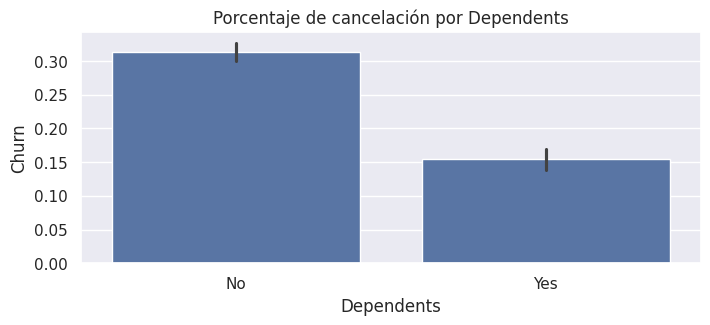

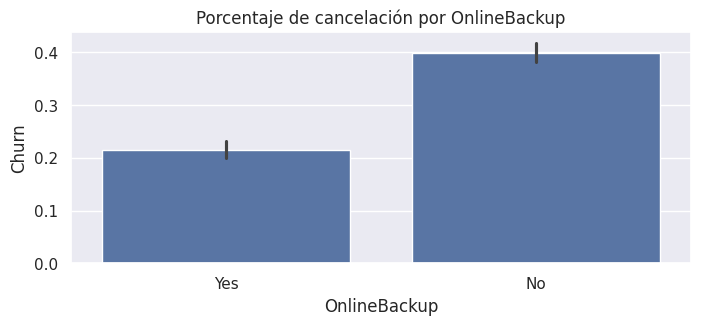

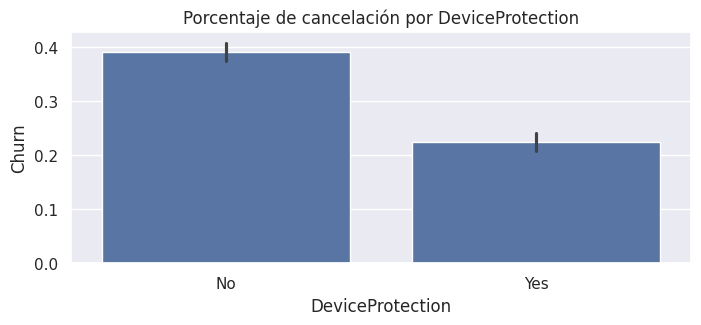

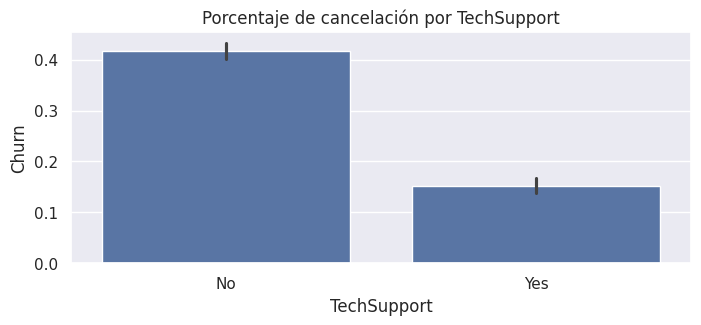

In [30]:
# Agreguen aquí el nombre de columnas entre comillas (ejemplo: "Partner").
# Si quieren agregar más de una columna, divídanlas por un coma (ejemplo: ["Partner", "gender"])
variables = ["Dependents", "OnlineBackup", 'DeviceProtection', 'TechSupport']

for var in variables:
  plt.figure(figsize=(8, 3))
  # Crear gráfico de barras con base en la columna seleccionada y la columna Churn (Finalizó o no el servicio)
  sns.barplot(data=dataset, x=var, y="Churn", ax=plt.gca())
  plt.title(f"Porcentaje de cancelación por {var}")
  plt.show()

Se puede observar que existe un mayor porcentaje de cancelación cuando no se tiene dependientes, es decir en el hogar no hay niños o jóvenes que disfruten de estos servicios, también si se tiene el servicio OnlineBackup, DeviceProtection o TechSupport estos son menos propensos a cancelarse.

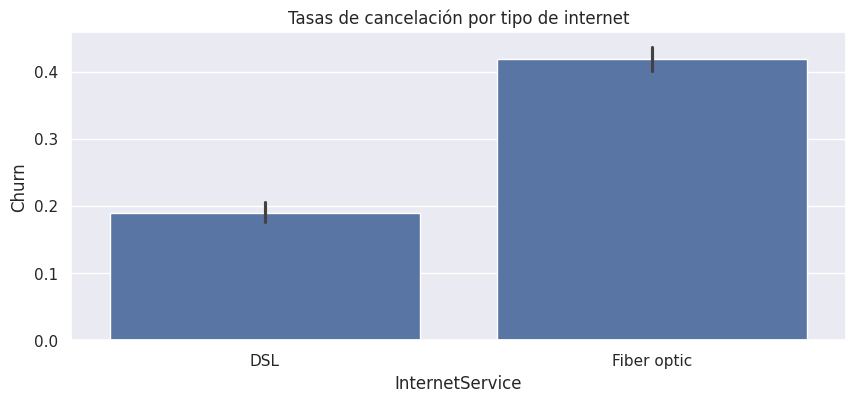

In [32]:
# Crear gráfico de barras con base en la columna Churn (Finalizó o no el servicio)
plt.figure(figsize=(10, 4))
sns.barplot(dataset, x="InternetService", y="Churn", ax=plt.gca())
plt.title("Tasas de cancelación por tipo de internet")
plt.show()

Se puede observar que a nivel de tipo del servicio de internet, existe un mayor índice de cancelación cuando este es Fibra Óptica.